# Praktikum 4: Machine Learning

## Aufgabe: Vergleich von Machine Learning Algorithmen für die Bildklassifizierung

**Ziel**: 

Ziel dieses Praktikums ist es, verschiedene Machine Learning Methoden zur Klassifikation von handgeschriebenen Ziffern (MNIST-Datensatz) zu erkunden und zu vergleichen. Durch diese Aufgabe sollt ihr ein tieferes Verständnis für die Stärken, Schwächen und Anwendungsgebiete verschiedener Machine Learning Algorithmen erlangen.

**Einführung**:

Der MNIST-Datensatz ist eine Sammlung von handgeschriebenen Ziffern, der häufig zum Einstieg in die Bilderkennung und Machine Learning genutzt wird. Er besteht aus 70.000 Bildern, wobei jedes Bild eine der Ziffern von 0 bis 9 darstellt. Diese Aufgabe bietet eine praktische Gelegenheit, grundlegende Techniken des Machine Learnings anzuwenden und zu vergleichen.
 
<img src="digits_output.png" alt="image" width="300" height="auto">

**Aufgabenübersicht**:

1. **Datenvorverarbeitung**:
    - Ladet die erste Version des MNIST-Datensatzes über scikit-learn.
    - Teilt den Datensatz in Trainings- und Testsets auf. Das Testset soll 20 % der Daten beinhalten.
    - Da es sich bei den Bildern um 28 x 28 Matrizen handelt, die ML Algorithmen jedoch Vektoren als Input erwarten, müsst ihr die Daten entsprechend umformen. Nutzt dafür die Funktion `reshape()`.
    - Skaliert die Daten auf den Wertebereich [0, 1]. Nutzt dafür den `MinMaxScaler` von scikit-learn.

2. **Klassifikation mit verschiedenen Algorithmen**:
    - Trainiert die folgenden Algorithmen:
        - Logistic Regression (mit `sklearn`)
        - Decision Tree (mit`sklearn`)
        - Random Forest (mit `sklearn`)
        - Support Vector Machine (mit `sklearn`)
        - Neural Network (mit `tensorflow.keras` und dem `Sequential`-Package):
            - Verwendet mindestens 2 Hidden Layers (Dense).
            - Nutzt die Loss Function `Crossentropy` (Achtung: Es gibt verschiedene Arten! Informiert euch darüber).
            - Verwendet die Aktivierungsfunktionen `relu` und `softmax` (Achtet darauf, welche für welche Layer geeignet sind).
            - Trainiert das Netz für 10 Epochen.
            - Nutzt die Funktion `summary()` um euch die Netzarchitektur ausgeben zu lassen.
    - Achtet auf eine sinnvolle Wahl der Hyperparameter. Informiert euch bei Bedarf auf den jeweiligen Dokumentationsseiten der Bibliotheken.
    - Evaluiert jedes Modell mit der Metrik `accuracy_score` auf dem Testset (Achtung: Das Vorgehen zur Evaluierung des Neural Networks ist etwas anders!).
    - Messt die Trainings- und Inferenzzeiten für die verschiedenen Algorithmen mit der Funktion `time()`.

3. **Evaluierung und Vergleich**:
    - Vergleicht die Leistung der Modelle in einer Pandas-Tabelle hinsichtlich Trainingszeit und Genauigkeit.
    - Beschreibt die Ergebnisse kurz in etwa 5 Sätzen.

## Datenvorverarbeitung

### Daten laden

Ladet die erste Version des MNIST-Datensatzes über scikit-learn.

In [41]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from time import time
import pandas as pd
import numpy as np

In [2]:
# MNIST DataSet laden
mnist = fetch_openml('mnist_784')

In [3]:
# Informationen über das MNIST DataSet

#mnist.values()
print(mnist.data.shape)
#print(mnist.target.shape)
#print(mnist.data.head())
#print(mnist.target.head())
print(mnist.DESCR)
#print(mnist.details)

(70000, 784)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 

In [4]:
# Extrahieren der Daten und Labels und konvertieren in gewünschte Formate
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

### Train-Test-Split

Teilt den Datensatz in Trainings- und Testsets auf. Nutzt die Funktion `train_test_split()` von scikit-learn. Das Testset soll 20 % der Daten beinhalten.

In [5]:
# DataSet in Trainings- und Testdaten splitten im Verhältnis 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
print("Shape der Trainingsdaten:", X_train.shape)
print("Shape der Testdaten:", X_test.shape)
print("Shape der Labels (Training):", y_train.shape)
print("Shape der Labels (Test):", y_test.shape)

Shape der Trainingsdaten: (56000, 784)
Shape der Testdaten: (14000, 784)
Shape der Labels (Training): (56000,)
Shape der Labels (Test): (14000,)


### Umwandlung in Vektoren

Da es sich bei den Bildern um 28 x 28 Matrizen handelt, die ML Algorithmen jedoch Vektoren als Input erwarten, müsst ihr die Daten entsprechend umformen. Nutzt dafür die Funktion `reshape()`.


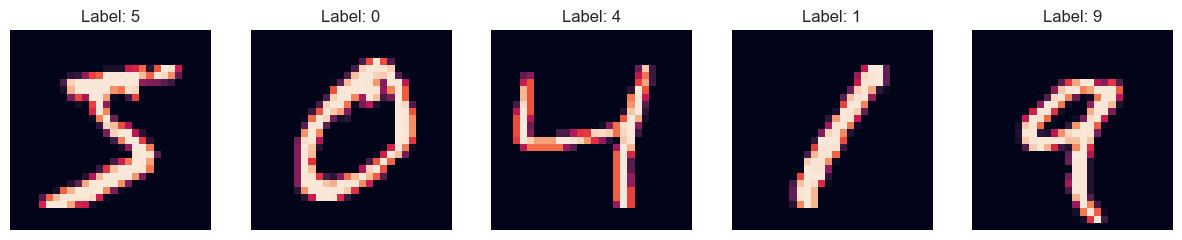

In [7]:
num = 5

plt.figure(figsize=(15, 20))
for i in range(num):
    img = X.iloc[i].values.reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

In [8]:
print(X.shape[1])
print(X_train.shape[1])
print(X_test.shape[1])

784
784
784


### Skalierung

Skaliert die Daten auf den Wertebereich [0, 1]. Nutzt dafür den `MinMaxScaler` von scikit-learn.

In [9]:
# Skalieren der Daten auf den Wertebereich [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Klassifikation mit verschiedenen Algorithmen
   - Trainiert die folgenden Algorithmen:
        - Logistic Regression (mit `sklearn`)
        - Decision Tree (mit`sklearn`)
        - Random Forest (mit `sklearn`)
        - Support Vector Machine (mit `sklearn`)
        - Neural Network (mit `tensorflow.keras` und dem `Sequential`-Package):
            - Verwendet mindestens 2 Hidden Layers (Dense).
            - Nutzt die Loss Function `Crossentropy` (Achtung: Es gibt verschiedene Arten! Informiert euch darüber).
            - Verwendet die Aktivierungsfunktionen `relu` und `softmax` (Achtet darauf, welche für welche Layer geeignet sind).
            - Trainiert das Netz für 10 Epochen.
            - Nutzt die Funktion `summary()` um euch die Netzarchitektur ausgeben zu lassen.
   - Achtet auf eine sinnvolle Wahl der Hyperparameter. Informiert euch bei Bedarf auf den jeweiligen Dokumentationsseiten der Bibliotheken.
   - Messt die Trainings- und Inferenzzeiten für die verschiedenen Algorithmen mit der Funktion `time()`.
   - Evaluiert jedes Modell mit der Metrik `accuracy_score` auf dem Testset (Achtung: Das Vorgehen zur Evaluierung des Neural Networks ist etwas anders!).

### Logistic Regression

- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Intercept**: Das Intercept (oder Bias) ist ein Array mit den Abfangwerten für die verschiedenen Klassen. Es verschiebt die Entscheidungsgrenze.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.
- **C**: Invers der Regularisierungsstärke; ein kleinerer Wert bedeutet stärkere Regularisierung.
- **N Jobs**: Anzahl der CPUs, die verwendet werden sollen. `None` bedeutet 1 CPU.
- **Dual**: Gibt an, ob das duale oder das primale Optimierungsproblem gelöst wird. Nur für `liblinear`-Solver relevant.
- **Fit intercept**: Ob ein Intercept in das Modell eingebaut wird.
- **Intercept Scaling**: Skalierung des Intercepts, nur relevant wenn `fit_intercept` und `solver='liblinear'`.
- **L1 Ratio**: Verhältnis von L1- und L2-Regularisierung; nur bei `ElasticNet` relevant.
- **Max Iter**: Maximale Anzahl der Iterationen bei der Optimierung.
- **N Iter**: Anzahl der Iterationen, die der Solver benötigt hat, um zu konvergieren.
- **Penalty**: Die Norm der Regularisierung (`'l2'`, `'l1'`, `'elasticnet'` oder `'none'`).
- **Solver**: Der Algorithmus, der zur Optimierung verwendet wird. Verschiedene Solver haben unterschiedliche Eigenschaften und Anforderungen.
- **Tol**: Toleranz für das Abbruchkriterium.
- **Verbose**: Gibt an, ob während der Ausführung des Solvers Informationen ausgegeben werden.
- **Warm Start**: Wenn `True`, werden die Ergebnisse der vorherigen Aufrufe von `fit` verwendet, um das Modell zu initialisieren.
- **Coef**: Die gelernten Koeffizienten für das Modell, ein Array der Form (n_classes, n_features). Diese Koeffizienten bestimmen die Entscheidungsgrenzen.


In [10]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=1000, random_state=0)

# Starte die Zeitmessung für das Training
start_time_lr = time()

# Trainieren des Modells
clf_lr.fit(X_train_scaled, y_train)

# Beende die Zeitmessung und berechne die Dauer
training_time_lr = time() - start_time_lr

In [11]:
from sklearn.metrics import accuracy_score

# Evaluieren des Modells
y_pred_lr = clf_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              {training_time_lr}
Accuracy:                   {accuracy_lr:.4f}
Intercept:                  {clf_lr.intercept_}
Class Weight:               {clf_lr.class_weight}
Classes:                    {clf_lr.classes_}
Random State:               {clf_lr.random_state}
C:                          {clf_lr.C}
N Jobs:                     {clf_lr.n_jobs}
Dual:                       {clf_lr.dual}
Fit intercept:              {clf_lr.fit_intercept}
Intercept Scaling:          {clf_lr.intercept_scaling}
L1 Ratio:                   {clf_lr.l1_ratio}
Max Iter:                   {clf_lr.max_iter}
N Iter:                     {clf_lr.n_iter_}
Penalty:                    {clf_lr.penalty}
Solver:                     {clf_lr.solver}
Tol:                        {clf_lr.tol}
Verbose:                    {clf_lr.verbose}
Warm Start:                 {clf_lr.warm_start}
Coef:                       {clf_lr.coef_}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              37.591176986694336
Accuracy:                   0.9176
Intercept:                  [-1.14023644  1.51324601  0.18178715 -0.91429774  0.15114695  2.0304898
 -0.35311116  1.44370957 -2.41653289 -0.49620124]
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Random State:               0
C:                          1.0
N Jobs:                     None
Dual:                       False
Fit intercept:              True
Intercept Scaling:          1
L1 Ratio:                   None
Max Iter:                   1000
N Iter:                     [237]
Penalty:                    l2
Solver:                     lbfgs
Tol:                        0.0001
Verbose:                    0
Warm Start:                 False
Coef:                       [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0

### Decision Tree

- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Criterion**: Das Kriterium, das verwendet wird, um die Qualität eines Splits zu messen (z. B. `gini` oder `entropy`).
- **Tree**: Das zugrundeliegende Baumobjekt, das die Baumstruktur des Modells speichert.
- **CCP Alpha**: Der Komplexität-Parameter (Cost-Complexity Pruning Alpha) zur Minimal-Reduktion der Komplexität des Baums.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Max Depth**: Die maximale Tiefe des Baumes. `None` bedeutet, dass der Baum so lange wächst, bis alle Blätter rein sind oder weniger als `min_samples_split` Samples enthalten.
- **Max Features**: Die maximale Anzahl von Features, die für die besten Splits berücksichtigt werden. `None` bedeutet, dass alle Features verwendet werden.
- **Max Leaf Nodes**: Die maximale Anzahl der Blätter. `None` bedeutet, dass unbegrenzt viele Blätter erzeugt werden können.
- **Min Samples Leaf**: Die minimale Anzahl von Samples, die in einem Blatt-Knoten vorhanden sein müssen.
- **Min Samples Split**: Die minimale Anzahl von Samples, die benötigt werden, um einen internen Knoten zu splitten.
- **Min Impurity Decrease**: Die minimale Verringerung der Ungleichheit, die ein Split verursachen muss, um als solcher akzeptiert zu werden.
- **Splitter**: Die Strategie, die verwendet wird, um den Split an jeder Knotenstelle zu wählen. Mögliche Werte sind `best` oder `random`.
- **Monotonic cst**: Einschränkungen für die Monotonie, die das Wachstum des Baumes steuern.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=0)

# Starte die Zeitmessung für das Training
start_time_dt = time()

# Trainieren des Modells
clf_dt.fit(X_train_scaled, y_train)

# Beende die Zeitmessung und berechne die Dauer
training_time_dt = time() - start_time_dt

cross_val_score(clf_dt, X_train_scaled, y_train, cv=10)

array([0.87107143, 0.86482143, 0.86178571, 0.86625   , 0.87660714,
       0.86089286, 0.87357143, 0.87214286, 0.87142857, 0.87017857])

In [13]:
# Evaluieren des Modells
y_pred_dt = clf_dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              {training_time_dt}
Accuracy:                   {accuracy_dt:.4f}
Criterion:                  {clf_dt.criterion}
Tree:                       {clf_dt.tree_}
CCP Alpha:                  {clf_dt.ccp_alpha}
Class Weight:               {clf_dt.class_weight}
Classes:                    {clf_dt.classes_}
Max Depth:                  {clf_dt.max_depth}
Max Features:               {clf_dt.max_features}
Max Leaf Nodes:             {clf_dt.max_leaf_nodes}
Min Samples Leaf:           {clf_dt.min_samples_leaf}
Min Samples Split:          {clf_dt.min_samples_split}
Min Impurity Decrease:      {clf_dt.min_impurity_decrease}
Splitter:                   {clf_dt.splitter}
Monotonic cst:              {clf_dt.monotonic_cst}
Random State:               {clf_dt.random_state}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              18.683835744857788
Accuracy:                   0.8680
Criterion:                  gini
Tree:                       <sklearn.tree._tree.Tree object at 0x000001F2A5D6A870>
CCP Alpha:                  0.0
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Max Depth:                  None
Max Features:               None
Max Leaf Nodes:             None
Min Samples Leaf:           1
Min Samples Split:          2
Min Impurity Decrease:      0.0
Splitter:                   best
Monotonic cst:              None
Random State:               0


### Random Forest

- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Criterion**: Das Kriterium, das verwendet wird, um die Qualität eines Splits zu messen (z. B. `gini` oder `entropy`).
- **Tree**: Das zugrundeliegende Baumobjekt, das die Baumstruktur des Modells speichert.
- **CCP Alpha**: Der Komplexität-Parameter (Cost-Complexity Pruning Alpha) zur Minimal-Reduktion der Komplexität des Baums.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Max Depth**: Die maximale Tiefe des Baumes. `None` bedeutet, dass der Baum so lange wächst, bis alle Blätter rein sind oder weniger als `min_samples_split` Samples enthalten.
- **Max Features**: Die maximale Anzahl von Features, die für die besten Splits berücksichtigt werden. `None` bedeutet, dass alle Features verwendet werden.
- **Max Leaf Nodes**: Die maximale Anzahl der Blätter. `None` bedeutet, dass unbegrenzt viele Blätter erzeugt werden können.
- **Min Samples Leaf**: Die minimale Anzahl von Samples, die in einem Blatt-Knoten vorhanden sein müssen.
- **Min Samples Split**: Die minimale Anzahl von Samples, die benötigt werden, um einen internen Knoten zu splitten.
- **Min Impurity Decrease**: Die minimale Verringerung der Ungleichheit, die ein Split verursachen muss, um als solcher akzeptiert zu werden.
- **Splitter**: Die Strategie, die verwendet wird, um den Split an jeder Knotenstelle zu wählen. Mögliche Werte sind `best` oder `random`.
- **Monotonic cst**: Einschränkungen für die Monotonie, die das Wachstum des Baumes steuern.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=0)

# Starte die Zeitmessung für das Training
start_time_rf = time()

# Trainieren des Modells
clf_rf.fit(X_train_scaled, y_train)

# Beende die Zeitmessung und berechne die Dauer
training_time_rf = time() - start_time_rf

In [15]:
y_pred_rf = clf_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              {training_time_rf}
Accuracy:                   {accuracy_rf:.4f}
Criterion:                  {clf_rf.criterion}
CCP Alpha:                  {clf_rf.ccp_alpha}
Class Weight:               {clf_rf.class_weight}
Classes:                    {clf_rf.classes_}
Max Depth:                  {clf_rf.max_depth}
Max Features:               {clf_rf.max_features}
Max Leaf Nodes:             {clf_rf.max_leaf_nodes}
Min Samples Leaf:           {clf_rf.min_samples_leaf}
Min Samples Split:          {clf_rf.min_samples_split}
Min Impurity Decrease:      {clf_rf.min_impurity_decrease}
Monotonic cst:              {clf_rf.monotonic_cst}
Random State:               {clf_rf.random_state}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              3.852198839187622
Accuracy:                   0.6533
Criterion:                  gini
CCP Alpha:                  0.0
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Max Depth:                  2
Max Features:               sqrt
Max Leaf Nodes:             None
Min Samples Leaf:           1
Min Samples Split:          2
Min Impurity Decrease:      0.0
Monotonic cst:              None
Random State:               0


### Support Vector Machine

- **Training Time**: Zeit, die für das Training des Modells benötigt wurde.
- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.
- **Tol**: Toleranz für das Abbruchkriterium.
- **C**: Der Strafterm C kontrolliert, wie stark das Modell gegenüber Klassifizierungsfehlern der Trainingsdaten penalisiert wird und beeinflusst damit die Komplexität der Entscheidungsgrenze.
- **NU**: Unterstützungsvolumen. Obere Grenze für den Bruchteil der Trainingsfehlerpunkte und untere Grenze für den Bruchteil der Support-Vektoren.
- **Verbose**: Gibt an, ob während der Ausführung des Solvers Informationen ausgegeben werden.
- **Max Iter**: Maximale Anzahl der Iterationen, die bei der Optimierung ausgeführt werden.
- **Break Ties**: Gibt an, ob eine Zufallsauswahl zum Brechen von Bindungen verwendet werden soll.
- **Cache Size**: Die Größe des Caches (in MB).
- **Coef 0**: Unbemerkte Parameter.
- **Degree**: Der Grad der Beziehung.
- **Epsilon**: Das Maß der Verfahrens.
- **Gamma**: Koeffizient für den Kernel.
- **Kernel**: Der verwendete Kernel.
- **Probability**: Gibt an, ob die Wahrscheinlichkeiten für die Klassenzuordnung berechnet werden sollen.
- **Shrinking**: Gibt an, ob die Heuristik zum Schrumpfen verwendet wird.
- **Unused Param**: Unbemerkte Parameter.
- **Decision Function Shape**: Die Form des Entscheidungsfunktionsausgangs.

In [92]:
from sklearn import svm

clf_svm = svm.SVC()

# Starte die Zeitmessung für das Training
start_time_svm = time()

# Trainieren des Modells
clf_svm.fit(X_train_scaled, y_train)

# Beende die Zeitmessung und berechne die Dauer
training_time_svm = time() - start_time_svm

In [93]:
y_pred_svm = clf_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              {training_time_svm}
Accuracy:                   {accuracy_svm:.4f}
Class Weight:               {clf_svm.class_weight}
Classes:                    {clf_svm.classes_}
Random State:               {clf_svm.random_state}
Tol:                        {clf_svm.tol}
C:                          {clf_svm.C}
NU:                         {clf_svm.nu}
Verbose:                    {clf_svm.verbose}
Max Iter:                   {clf_svm.max_iter}
Break Ties:                 {clf_svm.break_ties}
Cache Size:                 {clf_svm.cache_size}
Coef 0:                     {clf_svm.coef0}
Degree:                     {clf_svm.degree}
Epsilon:                    {clf_svm.epsilon}
Gamma:                      {clf_svm.gamma}
Kernel:                     {clf_svm.kernel}
Probability:                {clf_svm.probability}
Shrinking:                  {clf_svm.shrinking}
Unused Param:               {clf_svm.unused_param}
Decision Function Shape:    {clf_svm.decision_function_shape}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Training Time:              372.80219435691833
Accuracy:                   0.9760
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Random State:               None
Tol:                        0.001
C:                          1.0
NU:                         0.0
Verbose:                    False
Max Iter:                   -1
Break Ties:                 False
Cache Size:                 200
Coef 0:                     0.0
Degree:                     3
Epsilon:                    0.0
Gamma:                      scale
Kernel:                     rbf
Probability:                False
Shrinking:                  True
Unused Param:               nu
Decision Function Shape:    ovr


### Neural Network

- **Name**: Der Name des Modells.
- **Training Time**: Die Zeit, die für das Training des Modells benötigt wurde.
- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten, auf vier Dezimalstellen genau.
- **Loss**: Der Verlustwert des Modells, auf vier Dezimalstellen genau.
- **Activity Regularizer**: Ein optionaler Regularisierer für Aktivitäten im Modell.
- **Autocast**: Gibt an, ob die automatische Typumwandlung aktiviert ist.
- **Compiled**: Gibt an, ob das Modell kompiliert wurde und bereit ist für das Training.
- **Stop Training**: Ein Flag, das angibt, ob das Training des Modells gestoppt wurde.
- **Stop Evaluating**: Ein Flag, das angibt, ob die Evaluierung des Modells gestoppt wurde.
- **Stop Predicting**: Ein Flag, das angibt, ob die Vorhersage des Modells gestoppt wurde.
- **Steps per Execution**: Die Anzahl der Schritte pro Ausführung des Modells.
- **Built**: Ein Flag, das angibt, ob das Modell gebaut wurde.
- **Supports jit**: Gibt an, ob das Modell Just-In-Time (JIT) Kompilierung unterstützt.
- **Test Function**: Die Funktion, die für die Testphase des Modells verwendet wird.
- **Train Function**: Die Funktion, die für die Trainingsphase des Modells verwendet wird.
- **Predict Function**: Die Funktion, die für die Vorhersagephase des Modells verwendet wird.
- **Optimizer**: Der Optimierer, der für das Training des Modells verwendet wird.


In [18]:
import tensorflow as tf
from keras.src import Sequential
from keras.src.layers import Dense, Flatten
from keras.src.losses import CategoricalCrossentropy
from keras.src.optimizers import Adam
from keras.src.activations import relu, softmax

In [42]:
# Modell erstellen
model = Sequential([
    #Flatten(input_shape=(28, 28)),  # Input Layer: Flatten der 28x28 Bilder zu 784-dimensionalen Vektoren
    Dense(128, activation=relu),    # Hidden Layer 1: 128 Neuronen, relu Aktivierungsfunktion
    Dense(64, activation=relu),     # Hidden Layer 2: 64 Neuronen, relu Aktivierungsfunktion
    Dense(10, activation=softmax)   # Output Layer: 10 Neuronen (Anzahl Klassen), softmax Aktivierungsfunktion
])

# Anzahl der Klassen bestimmen
num_classes = len(np.unique(y_train))

# Kompilieren des Modells
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Modellzusammenfassung anzeigen
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Starte die Zeitmessung für das Training
start_time_nn = time()

# Modell trainieren
model.fit(X_train_scaled, tf.keras.utils.to_categorical(
        y_train, 
        num_classes=num_classes), 
        epochs=10, 
        validation_data=(X_test_scaled, tf.keras.utils.to_categorical(y_test, 
                                                                        num_classes=num_classes)))

# Beende die Zeitmessung und berechne die Dauer
training_time_nn = time() - start_time_nn

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0177 - val_accuracy: 0.9746 - val_loss: 0.1172
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0132 - val_accuracy: 0.9764 - val_loss: 0.1221
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0143 - val_accuracy: 0.9694 - val_loss: 0.1379
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9947 - loss: 0.0146 - val_accuracy: 0.9756 - val_loss: 0.1175
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.9749 - val_loss: 0.1215
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9758 - val_loss: 0.1257
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accuracy: 0.9741 - val_loss: 0.1491
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0090 - 

In [51]:
y_pred_nn = model.predict(X_test_scaled)

# ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets
#accuracy_nn = accuracy_score(y_test, y_pred_nn)

loss, accuracy_nn = model.evaluate(X_test_scaled, tf.keras.utils.to_categorical(y_test, num_classes=num_classes))

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Name:                       {model.name}
Training Time:              {training_time_svm}
Accuracy:                   {accuracy_nn:.4f}
Loss:                       {loss:.4f}
Activity Regularizer:       {model.activity_regularizer}
Autocast:                   {model.autocast}
Compiled:                   {model.compiled}
Stop Training:              {model.stop_training}
Stop Evaluating:            {model.stop_evaluating}
Stop Predicting:            {model.stop_predicting}
Steps per Execution:        {model.steps_per_execution}
Built:                      {model.built}
Supports jit:               {model.supports_jit}
Test Function:              {model.test_function}
Train Function:             {model.train_function}
Predict Function:           {model.predict_function}
Optimizer:                  {model.optimizer}
""")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9738 - loss: 0.1162

Modellinformationen:
----------------------------------------------------------------------------------
Name:                       sequential_1
Training Time:              169.72603011131287
Accuracy:                   0.9730
Loss:                       0.1167
Activity Regularizer:       None
Autocast:                   True
Compiled:                   True
Stop Training:              False
Stop Evaluating:            False
Stop Predicting:            False
Steps per Execution:        1
Built:                      True
Supports jit:               True
Test Function:              <tensorflow.python.eager.polymorphic_function.polymorphic_function.Function object at 0x000001F3447CAD50>
Train Function:             <tensorflow.python.eager.polymorphic_function.polymorphic_function.Function object at 0x000001F346D2BDD0>
Predict Function:           <tensorflow.python.eager.pol

In [52]:
metrics_names = model.metrics_names
print(metrics_names)

['loss', 'compile_metrics']


## Evaluierung und Vergleich
   - Vergleicht die Leistung der Modelle in einer Pandas-Tabelle hinsichtlich Trainingszeit, Inferenzzeit und Test Accuracy.
   - Beschreibt die Ergebnisse kurz in etwa 5 Sätzen.

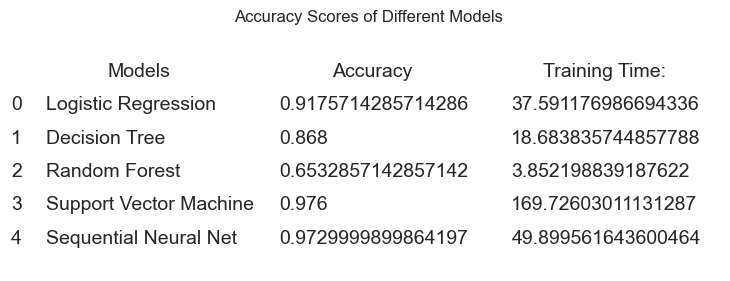

In [90]:
df_eval = pd.DataFrame({
    'Models': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Sequential Neural Net'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_nn],
    'Training Time:': [training_time_lr, training_time_dt, training_time_rf, training_time_svm, training_time_nn]
})

fix, ax = plt.subplots(figsize=(3,3))
ax.axis('off')
col_widths = [.5,.5,.5]
table = pd.plotting.table(ax, 
                          df_eval, 
                          loc='center', 
                          cellLoc='left', 
                          colWidths=col_widths, 
                          rowLoc='center',
                          edges='open')

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 2)

plt.suptitle('Accuracy Scores of Different Models')
plt.show()